In [3]:
from torchvision.datasets import DatasetFolder
from torchvision.transforms import transforms as tt
from torch.utils.data import DataLoader
import torch
import os
import numpy as np

In [2]:
train_path = "C:/Users/Yina Gao/Documents/thesis-brain-tumour/test_output/splits/train"
val_path = "C:/Users/Yina Gao/Documents/thesis-brain-tumour/test_output/splits/val"
test_path = "C:/Users/Yina Gao/Documents/thesis-brain-tumour/test_output/splits/test"

In [5]:
from pathlib import Path

all_paths = [
    ("TRAIN Split", train_path),
    ("VAL Split", val_path),
    ("TEST Split", test_path)
]

for split_name, folder in all_paths:
    parent_path = Path(folder)
    
    print(f"\n--- Results for: **{split_name}** ---")
    
    # Check if the parent path exists
    if not parent_path.is_dir():
        print(f"Error: Directory not found at `{folder}`")
        continue

    # Iterate through all immediate items in the parent directory
    for class_folder in parent_path.iterdir():
        # Check if the item is a directory (representing a class)
        if class_folder.is_dir():
            # Get the class name from the folder name
            class_name = class_folder.name
            
            # Count the number of .npy files in the class folder
            # glob("*.npy") finds all files with the .npy extension
            npy_files_count = len(list(class_folder.glob("*.npy")))
            
            print(f"Class **'{class_name}'**: {npy_files_count} .npy files")


--- Results for: **TRAIN Split** ---
Class **'medulloblastoma'**: 73 .npy files
Class **'plgg'**: 327 .npy files

--- Results for: **VAL Split** ---
Class **'medulloblastoma'**: 15 .npy files
Class **'plgg'**: 70 .npy files

--- Results for: **TEST Split** ---
Class **'medulloblastoma'**: 17 .npy files
Class **'plgg'**: 71 .npy files


In [3]:
## define transforms
transforms = tt.Compose([tt.ToTensor()])

## define some parameters
bs = 1

In [4]:
# define dataset loader
def custom_loader(path):
    return np.load(path)


In [5]:

# Load dataset
train_dataset = DatasetFolder(train_path, loader=custom_loader, transform=transforms, extensions=[".npy"])
# Access class labels
print(train_dataset.classes)
# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

val_dataset = DatasetFolder(val_path, loader=custom_loader, transform=tt.ToTensor(), extensions=[".npy"])
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
test_dataset = DatasetFolder(test_path, loader=custom_loader, transform=tt.ToTensor(), extensions=[".npy"])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

['dipg', 'medulloblastoma', 'plgg']


## visualize slices

torch.Size([7, 115, 118]) medulloblastoma
torch.Size([62, 64, 59]) plgg
torch.Size([58, 91, 82]) plgg
torch.Size([24, 31, 27]) plgg
torch.Size([65, 83, 83]) plgg
torch.Size([8, 100, 114]) medulloblastoma
torch.Size([6, 69, 64]) dipg
torch.Size([52, 57, 57]) plgg
torch.Size([57, 64, 62]) plgg
torch.Size([7, 91, 84]) dipg
torch.Size([14, 103, 99]) medulloblastoma
torch.Size([23, 29, 38]) plgg
torch.Size([72, 85, 86]) plgg
torch.Size([4, 75, 72]) medulloblastoma
torch.Size([62, 64, 59]) plgg
torch.Size([27, 33, 28]) plgg
torch.Size([20, 26, 29]) plgg
torch.Size([23, 28, 29]) plgg
torch.Size([24, 421, 512]) medulloblastoma
torch.Size([23, 29, 38]) plgg


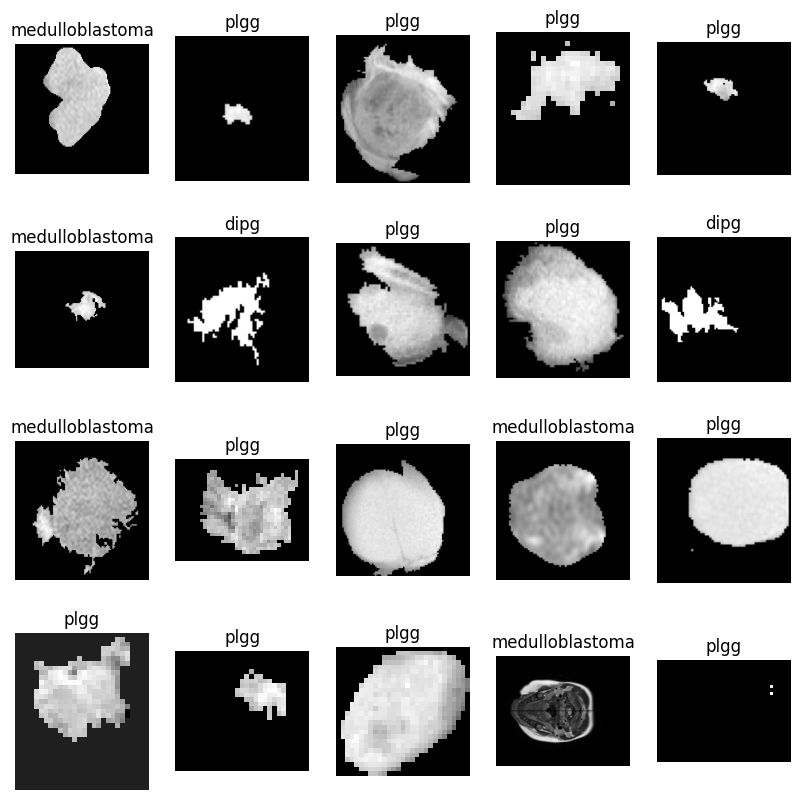

In [10]:
import matplotlib.pyplot as plt
from random import randint

labels_map = {
    0: "dipg",
    1: "medulloblastoma",
    2: "plgg"
}

figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    tensor, label = train_dataset[sample_idx]
    print(tensor.shape, labels_map[label])
    channels, h, w = tensor.shape
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(tensor[randint(0, channels)-1].squeeze(), cmap="gray")
plt.show()

## what's wrong with the medulloblastoma data?

In [29]:
import math 

med_path = "test_output/splits/train/medulloblastoma"
plgg_path = "test_output/splits/train/plgg"
dipg_path = "test_output/splits/train/dipg"

# Collect .npy files
med_files = [f for f in os.listdir(med_path) if f.endswith(".npy")]
plgg_files = [f for f in os.listdir(plgg_path) if f.endswith(".npy")]
dipg_files = [f for f in os.listdir(dipg_path) if f.endswith(".npy")]

def plot_images(npy_files:list, data_path:str):
# Determine grid size
    n = len(npy_files)
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

    # Flatten axes for easier indexing (even if grid isn't square)
    axes = axes.flatten()

    for ax, file in zip(axes, npy_files):
        file_path = os.path.join(data_path, file)

        # Load volume
        volume = np.load(file_path)
        

        # Middle slice
        mid = volume.shape[2] // 2 # note: last dim is depth, but double check that its the same for the other classes
        slice_img = volume[:, :, mid]

        ax.imshow(slice_img, cmap='gray')
        ax.set_title(f"{file} with shape{volume.shape}")
        ax.axis('off')

    # Turn off any leftover empty subplots
    for ax in axes[len(npy_files):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

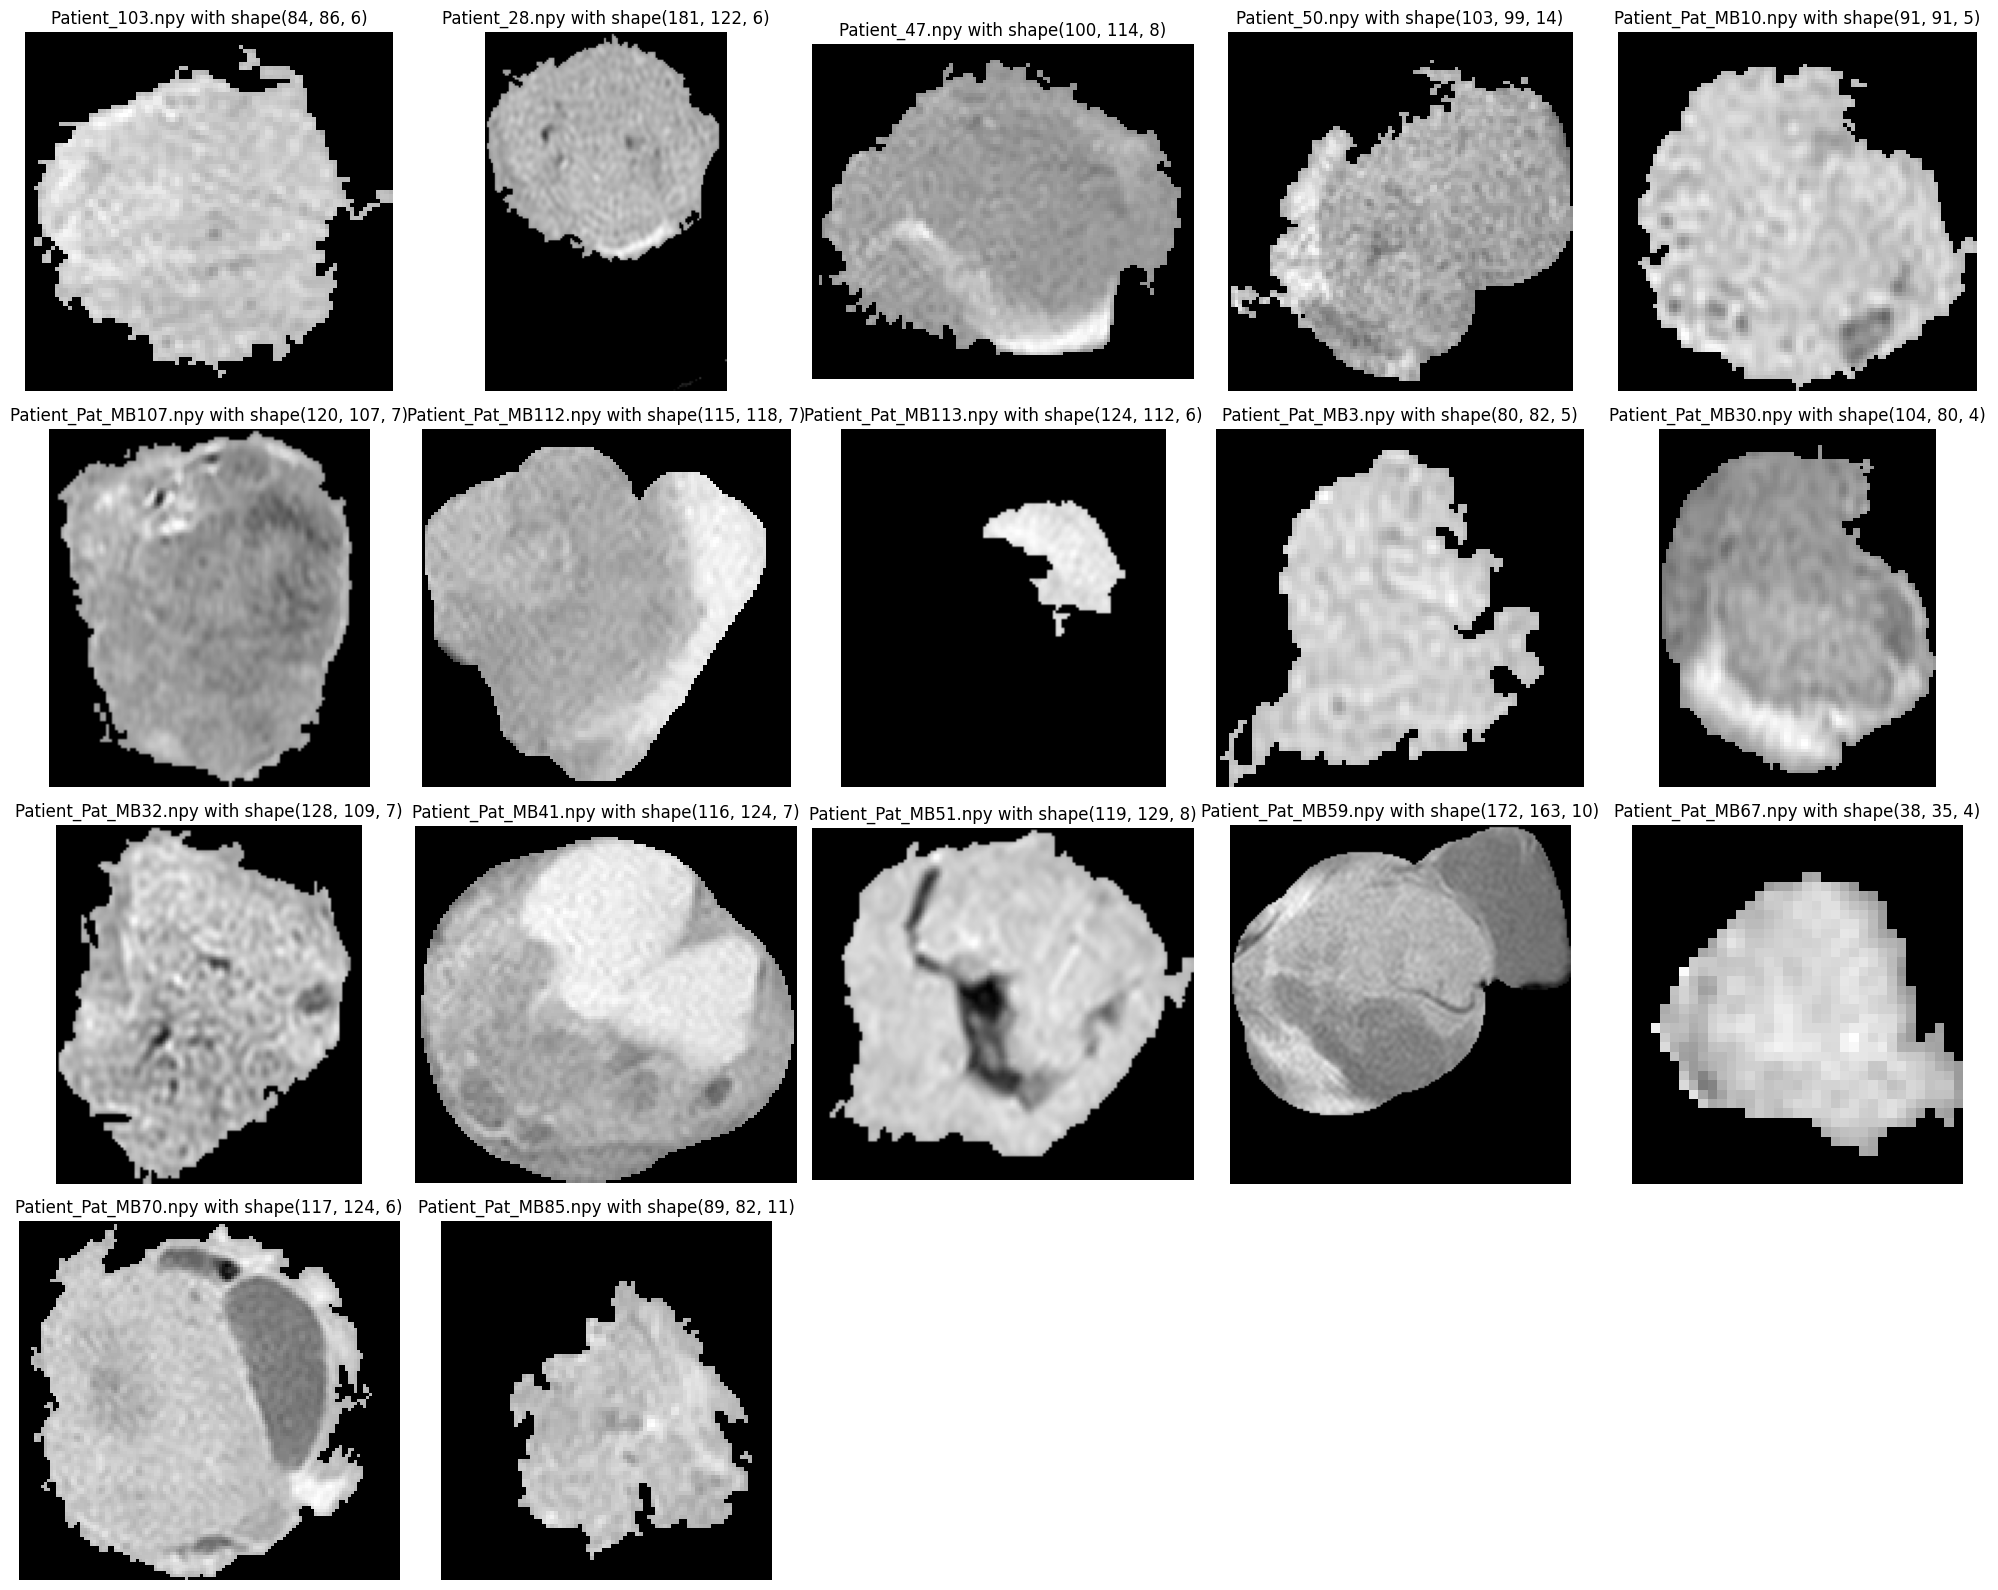

In [27]:
plot_images(med_files, med_path)

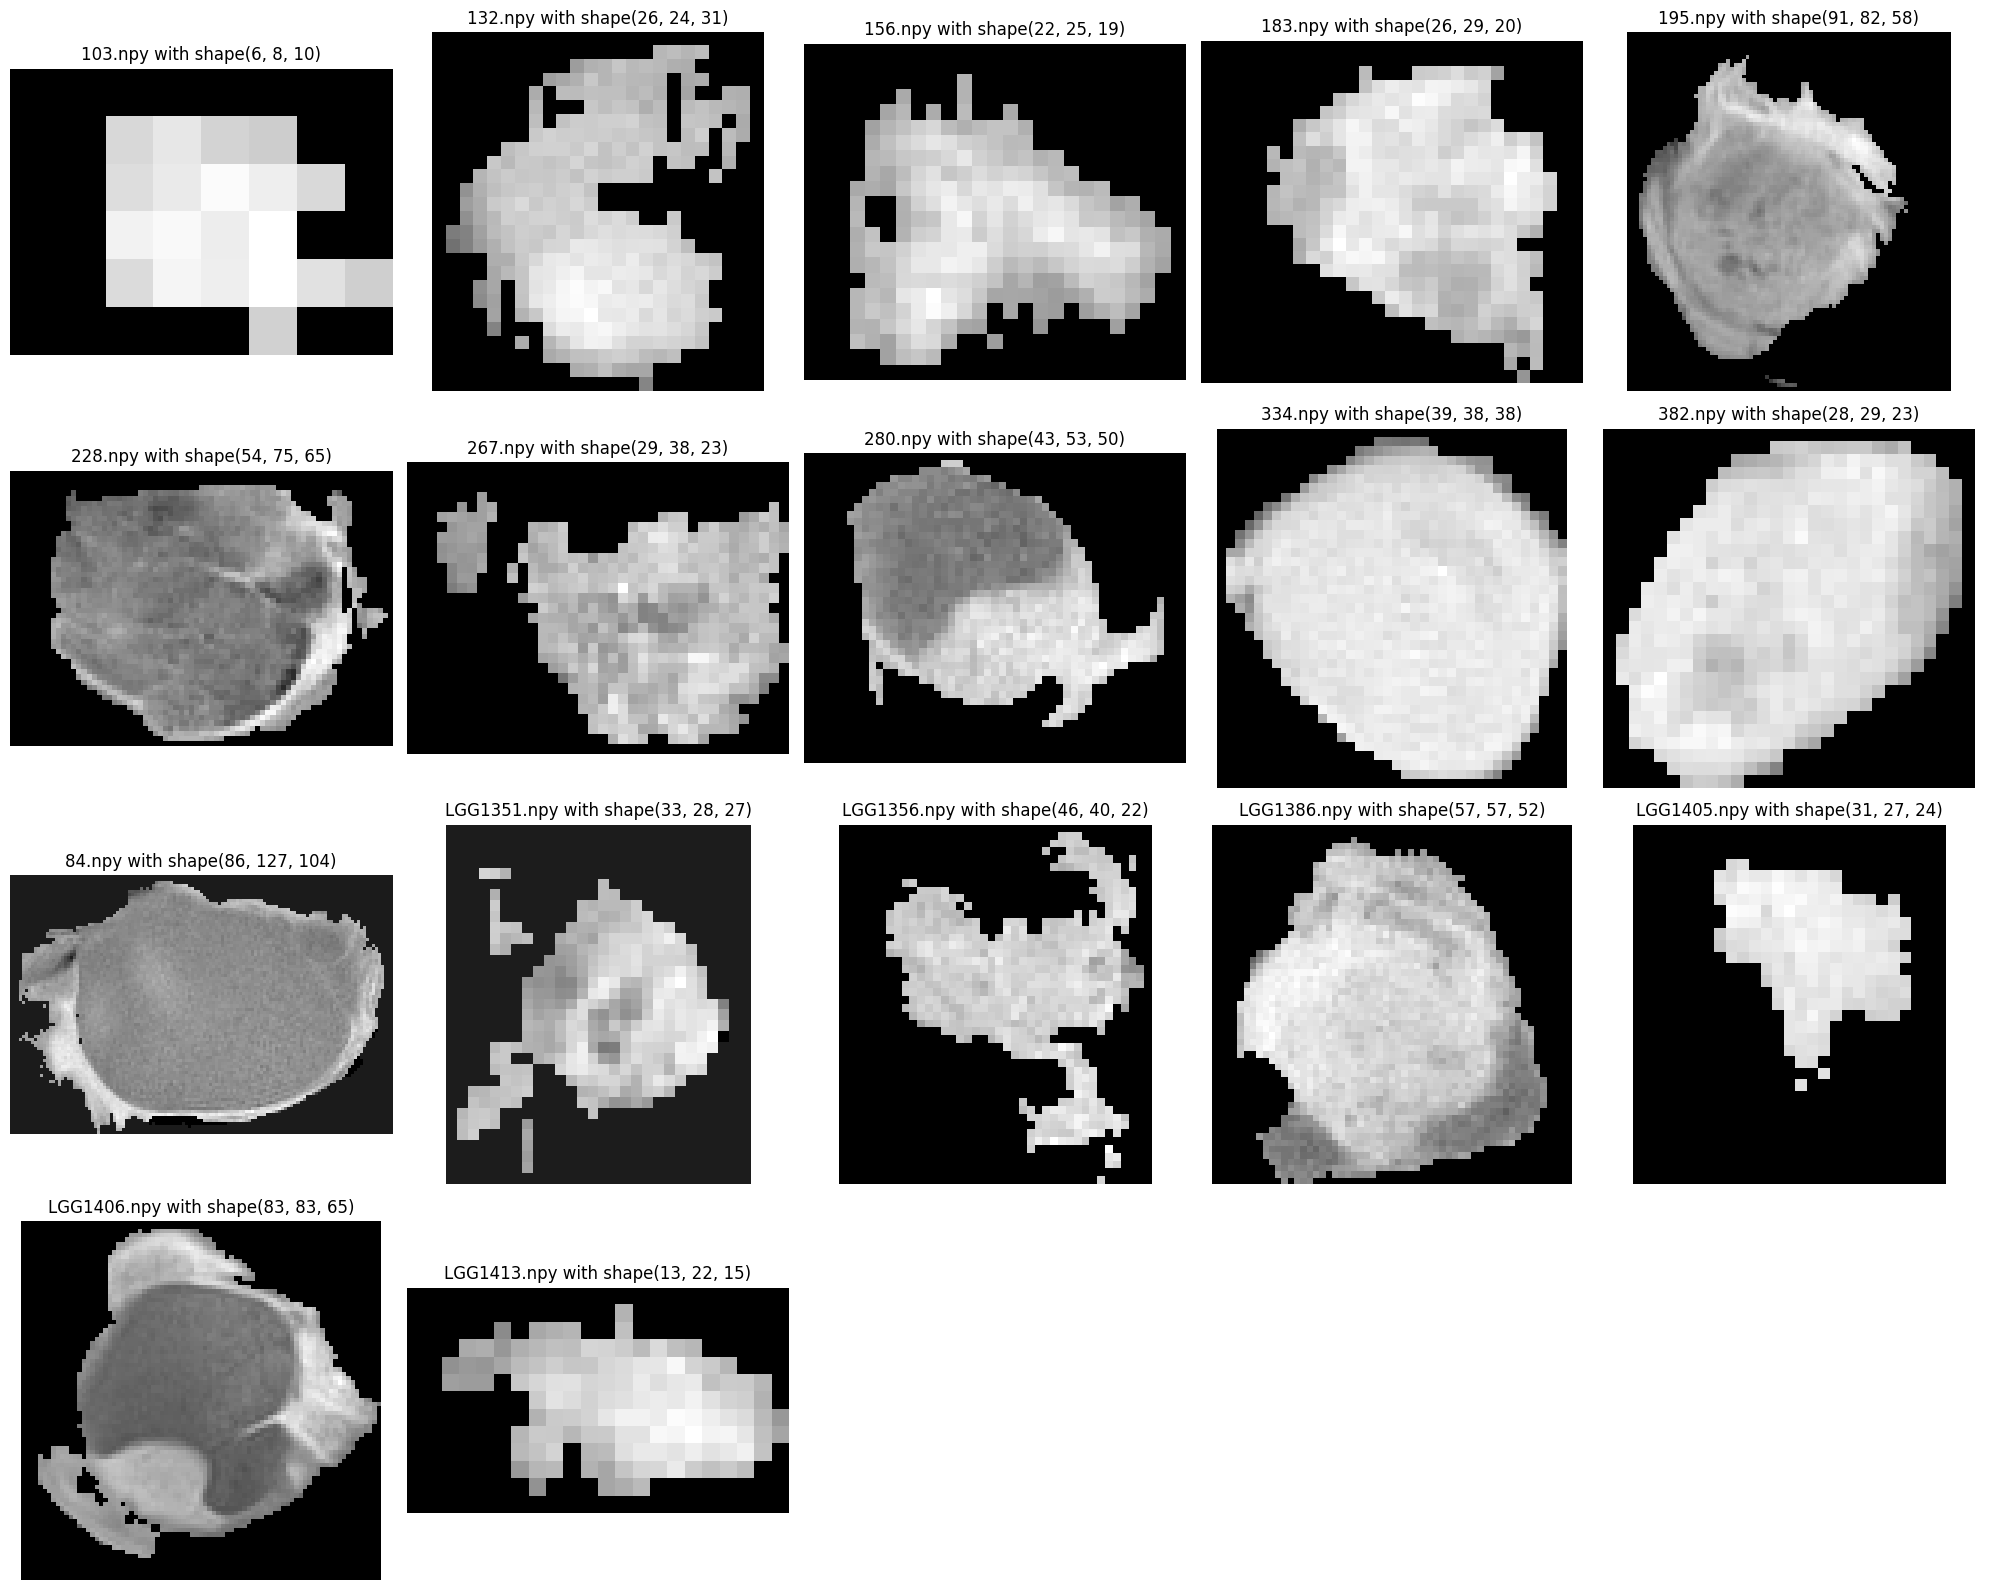

In [28]:
plot_images(plgg_files, plgg_path)

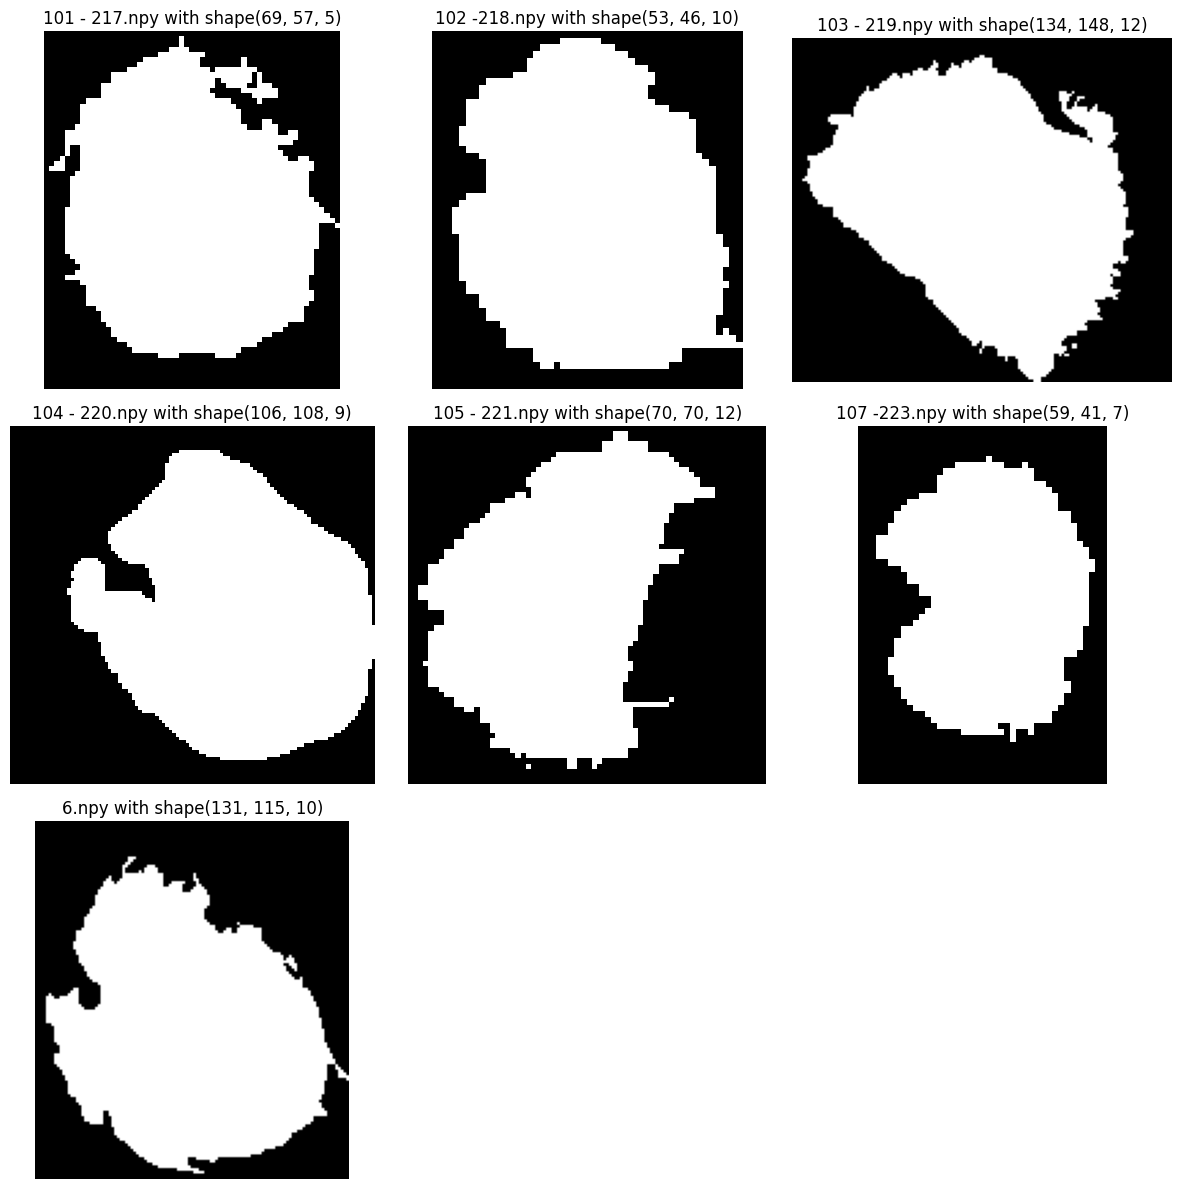

In [30]:
plot_images(dipg_files, dipg_path)

## Double check all images are aligned in the same plane

In [3]:
import json
from data.utils import nrrd_to_npy


with open("test_output/dipg_data.json", "r") as f:
    dipg_dict = json.load(f)

with open("test_output/plgg_data.json", "r") as f:
    plgg_dict = json.load(f)

with open("test_output/medullo_data.json", "r") as f:
    medullo_dict = json.load(f)

In [13]:
def get_images(patient_dict):
    patient_ids = list(patient_dict.keys())
    selected_ids = patient_ids[:10]   # use first 10

    images = []
    for pid in selected_ids:
        flair_path = patient_dict[pid]["flair"]

        img = nrrd_to_npy(flair_path)

        # Select middle slice
        mid = img.shape[2] // 2  
        slice_img = img[:,:,mid]

        images.append((pid, slice_img))
    
    return images

def get_npy_images(patient_dict):
    patient_ids = list(patient_dict.keys())
    selected_ids = patient_ids[:10]   # use first 10

    images = []
    for pid in selected_ids:
        flair_path = patient_dict[pid]["flair"]

        img = np.load(flair_path)

        # Select middle slice
        mid = img.shape[2] // 2  
        slice_img = img[:,:,mid]

        images.append((pid, slice_img))
    
    return images

In [8]:
images = get_images(medullo_dict)

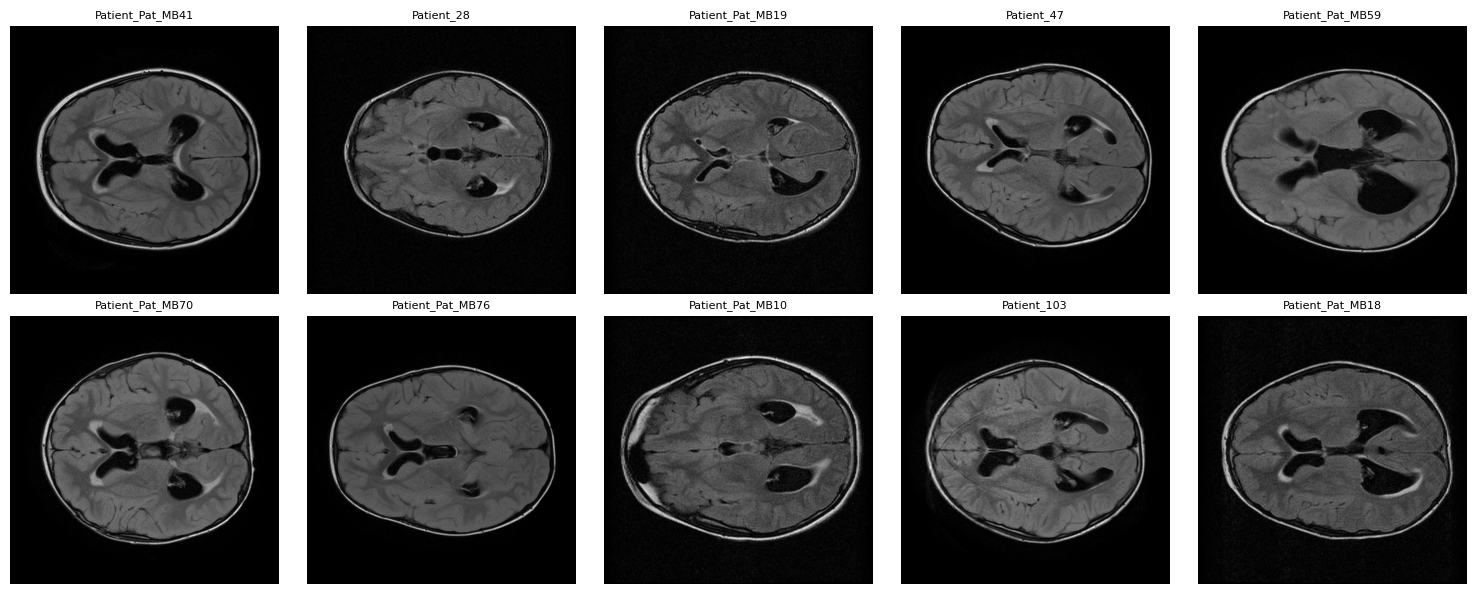

In [12]:
import matplotlib.pyplot as plt
n = len(images)
cols = 5
rows = int(np.ceil(n / cols))

plt.figure(figsize=(15, 6))

for i, (pid, img_slice) in enumerate(images):
    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(img_slice, cmap="gray")
    ax.set_title(pid, fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()

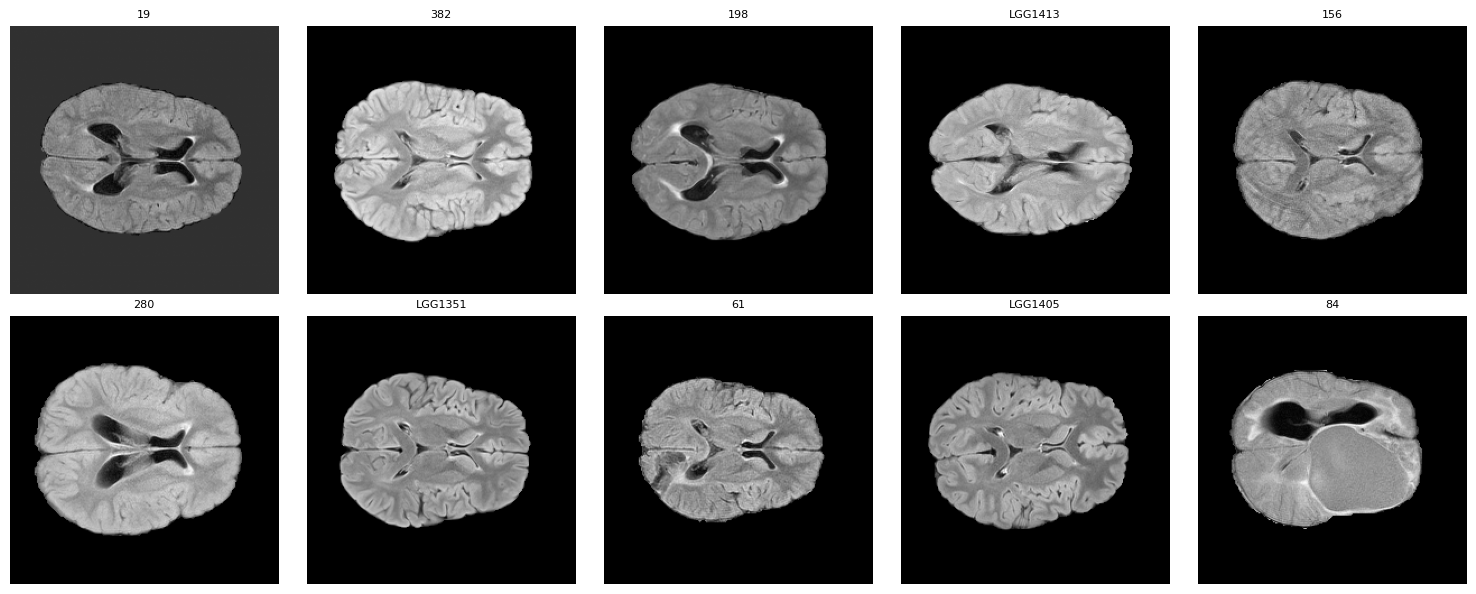

In [14]:
images = get_npy_images(plgg_dict)
n = len(images)
cols = 5
rows = int(np.ceil(n / cols))

plt.figure(figsize=(15, 6))

for i, (pid, img_slice) in enumerate(images):
    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(img_slice, cmap="gray")
    ax.set_title(pid, fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()